<a href="https://www.kaggle.com/code/wattuginu/ica-exploration?scriptVersionId=193387441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ICA Exploration Trial

## import library

In [1]:
!pip install scikit-bio

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from skbio.stats.composition import clr
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - \ | / - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp310-cp310-linux_x86_64.whl size=2504430 sha256=fc6c437b7374074ae56eb2b8e7d8b2312df3008d1367291203986eefee80c3ae
  Stored in directory: /root/.cache/pip/wheels/f3/9c/ed/c2b94011fd3765a19330df93f81265e178098dd86c047c1566
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=11812703 sha256=f80f313802acc0fff1e706c8f87f

## Preprocessing

In [2]:
def preproccesing(df):
    # HFSE
    # La, Ce, Nd, Eu, Gd, Dy, Er, Yb, Th, Nb, Zr, Y
    # LILE
    # Sr, Rb, Ba
    # Create new ratio
    # LILE/LILE
    df["Rb/Sr"] = df["Rb"] / df["Sr"]
    # LILE/HFSE
    df["Ba/Nb"] = df["Ba"] / df["Nb"]
    df["Sr/Y"] = df["Sr"] / df["Y"]
    df["Rb/Yb"] = df["Rb"] / df["Yb"]
    # HFSE/HFSE
    df["Nb/Er"] = df["Nb"] / df["Er"]
    df["Nb/Zr"] = df["Nb"] / df["Zr"]
    df["La/Yb"] = df["La"] / df["Yb"]
    df["Nb/Y"] = df["Nb"] / df["Y"]
    df["Th/Ce"] = df["Th"] / df["Ce"]
    df["Eu/La"] = df["Eu"] / df["La"]
    # Choose important variable
    ratio = [
        "Ba/Nb", "Nb/Zr", "La/Yb", "Sr/Y", "Rb/Sr", "Th/Ce", "Eu/La", "Rb/Yb",
        "Nb/Y", "Nb/Er"
    ]

    frame = [
        "Location", "Longitude", "Latitude", "AGE", "Sample Name", "Island Arc"
    ]
    # Separate the data based on the variable
    ratioData = df[ratio]
    frameData = df[frame]
    # change inf value to nan
    ratioData.loc[:, :] = ratioData.loc[:, :].replace([np.inf, -np.inf], np.nan)
    # Drop Na value
    cleanData = ratioData.dropna(thresh=10)
    zScore = np.abs(st.zscore(cleanData))
    cleanDataZScore = cleanData[(zScore < 3).all(axis=1)]
    # concat kedua dataframe
    concatData = pd.concat([cleanDataZScore, frameData], axis=1, join='inner')
    concatData.reset_index(drop=True, inplace=True)
    concatData.to_csv('10_rasio_trace_element.csv')
    preprocessingData = concatData[ratio]
    
    return preprocessingData, concatData, frame, ratio
    
df = pd.read_csv("/kaggle/input/geochemistry/Dataset.csv")

preprocessingData, concatData, frame, ratio = preproccesing(df)

In [3]:
preprocessingData

,Ba/Nb,Nb/Zr,La/Yb,Sr/Y,Rb/Sr,Th/Ce,Eu/La,Rb/Yb,Nb/Y,Nb/Er
0,205.093834,0.016993,3.601266,30.612245,0.038000,0.062174,0.161863,10.822785,0.050748,0.438824
1,178.761062,0.017574,3.860577,26.979167,0.035135,0.066321,0.136986,8.750000,0.058854,0.511312
2,80.691643,0.021159,2.198433,8.080808,0.091250,0.087940,0.171021,5.718016,0.116835,0.940379
3,120.000000,0.020315,3.169611,15.740741,0.039529,0.067485,0.128205,5.936396,0.057407,0.534483
4,150.961538,0.023744,3.564972,27.312500,0.048055,0.070199,0.150872,11.864407,0.065000,0.550265
...,...,...,...,...,...,...,...,...,...,...
132,109.310345,0.024370,6.116838,12.183099,0.112717,0.170604,0.078090,13.402062,0.102113,1.115385
133,102.500000,0.026954,5.789474,17.489177,0.049505,0.130252,0.100909,10.526316,0.086580,1.052632
134,82.000000,0.024752,4.881517,12.727273,0.077922,0.132780,0.091262,11.374408,0.103306,1.136364
135,91.153846,0.024299,4.854369,13.562753,0.086567,0.130612,0.094000,14.077670,0.105263,1.368421


In [4]:
def transformer(preprocessingData, transformer):
    if transformer == 1:
        transformedData = StandardScaler().fit_transform(preproccesing)
        transformatorName = "StandardScaler"
    if transformer == 2:
        transformedData = PowerTransformer().fit_transform(preprocessingData)
        transformatorName = "PowerTransformerY"
    if transformer == 3:
        transformedData = PowerTransformer(method="box-cox").fit_transform(preprocessingData)
        transformatorName = "PowerTransformerB"
    if transformer == 4:
        transformedData = Normalizer().fit_transform(preprocessingData)
        transformatorName = "Normalizer"
    if transformer == 5:
        transformedData = RobustScaler().fit_transform(preprocessingData)
        transformatorName = "RobustScaler"
    if transformer == 6:
        transformedData = QuantileTransformer().fit_transform(preprocessingData)
        transformatorName = "QuantileTransformerU"
    if transformer == 7:
        transformedData = QuantileTransformer(
            output_distribution="normal").fit_transform(preprocessingData)
        transformatorName = "QuantileTransformerN"
    if transformer == 8:
        transformedData = clr(preprocessingData)
        transformatorName = "ClrTransformation"
    
    transformedDataframe = pd.DataFrame(transformedData)
    
        
    return transformedData, transformatorName, transformedDataframe

transformedData, transformatorName, transformedDataframe = transformer(preprocessingData, 8)

## PCA

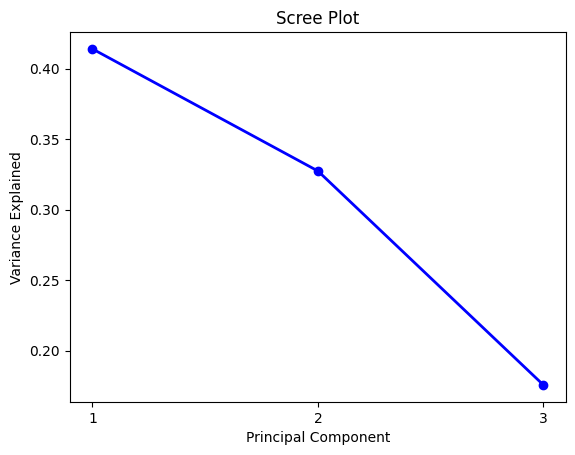

Principal Components: 
 [[0.34208362 0.04814242 0.28429866 0.05482277 0.20293736 0.10704466
  0.65553313 0.17111792 0.32707109 0.42214593]
 [0.09469193 0.20573459 0.1082147  0.48464479 0.71081725 0.17331921
  0.25127384 0.31924999 0.03299307 0.02583351]
 [0.50549625 0.41172052 0.23108772 0.35479613 0.04862855 0.10457406
  0.34816187 0.34540222 0.21322442 0.3104729 ]]
Explained Variance Ratio: 
 [0.41407654 0.3274409  0.1756138 ]
Loading Vectors: 
 [[ 0.34285157 -0.08439427  0.32993683]
 [-0.04825049 -0.18336115 -0.26872952]
 [-0.28493688 -0.09644646  0.15083069]
 [-0.05494584 -0.43194013  0.23157503]
 [ 0.20339293  0.63351654 -0.0317398 ]
 [ 0.10728497  0.15447091 -0.06825537]
 [ 0.65700473 -0.22394805 -0.22724485]
 [-0.17150206  0.28453185  0.22544364]
 [-0.32780533 -0.0294051  -0.13917134]
 [-0.4230936  -0.02302414 -0.20264531]]


In [5]:
def pc(transformedData, numberOfComponent, concatData, frame, ratio, transformatorName):
    # fitting
    pca = PCA(n_components=numberOfComponent, whiten=True)
    principalComponent = pca.fit_transform(transformedData)
    
    # Explained variance
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values,
             pca.explained_variance_ratio_,
             'o-',
             linewidth=2,
             color='blue')
    plt.title('Scree Plot')
    plt.xticks([x for x in range(1, numberOfComponent+1)])
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()
    
    # Components
    principalComponents = abs(pca.components_)
    print("Principal Components: \n", principalComponents)
    
    explainedVarianceRatio = pca.explained_variance_ratio_
    print("Explained Variance Ratio: \n", explainedVarianceRatio)
    
    loadingVectors = pca.components_.T * np.sqrt(pca.explained_variance_)
    print("Loading Vectors: \n", loadingVectors)
    
    principalComponentsData = pd.DataFrame(data=principalComponent, columns=['PC1', 'PC2', 'PC3'])
    principalComponentsDataframe = pd.concat([principalComponentsData, concatData[frame]], axis=1)
    principalComponentsDataframe.to_csv(f"TraceElement_PCA_{numberOfComponent}_{transformatorName}.csv")
    
    return principalComponentsDataframe, principalComponent, loadingVectors, explainedVarianceRatio
    
numberOfComponent = 3
principalComponentsDataframe, principalComponent, loadingVectors, explainedVarianceRatio = pc(transformedData, numberOfComponent, concatData, frame, ratio, transformatorName)

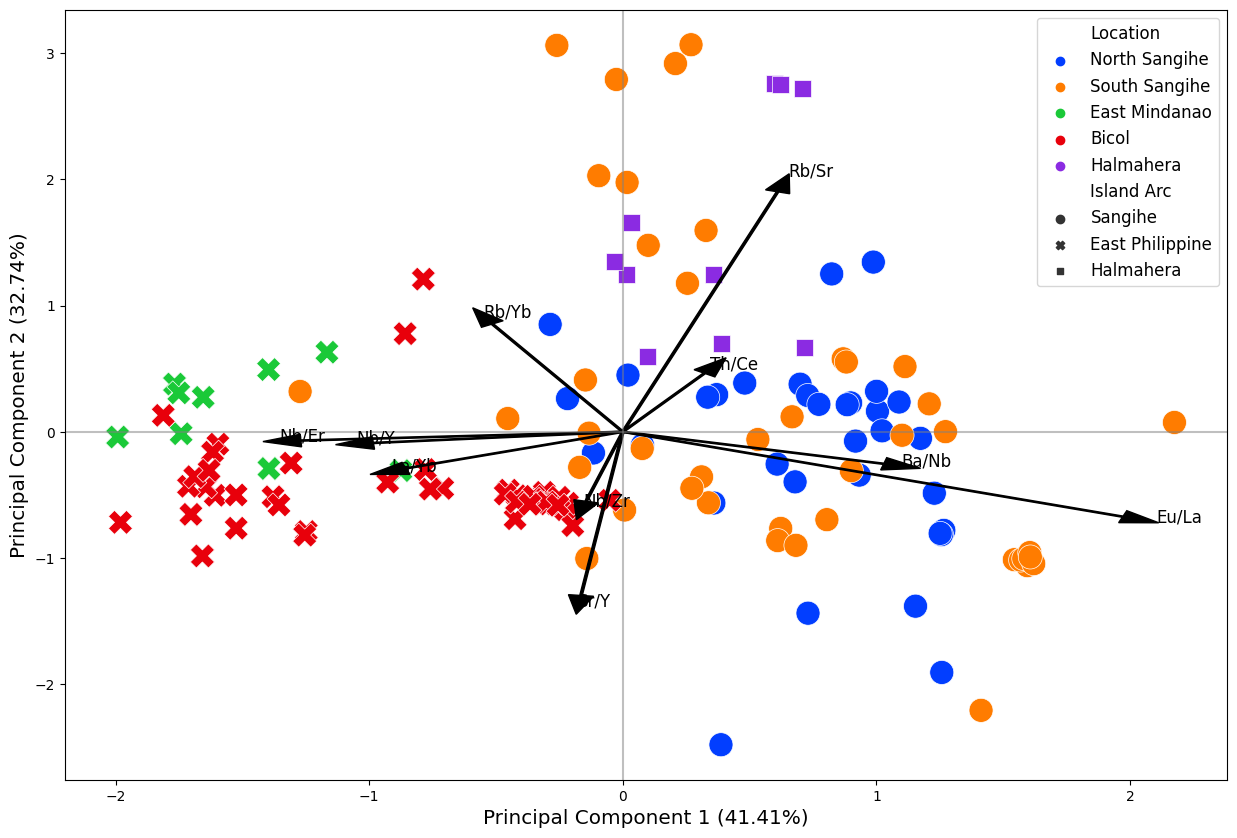

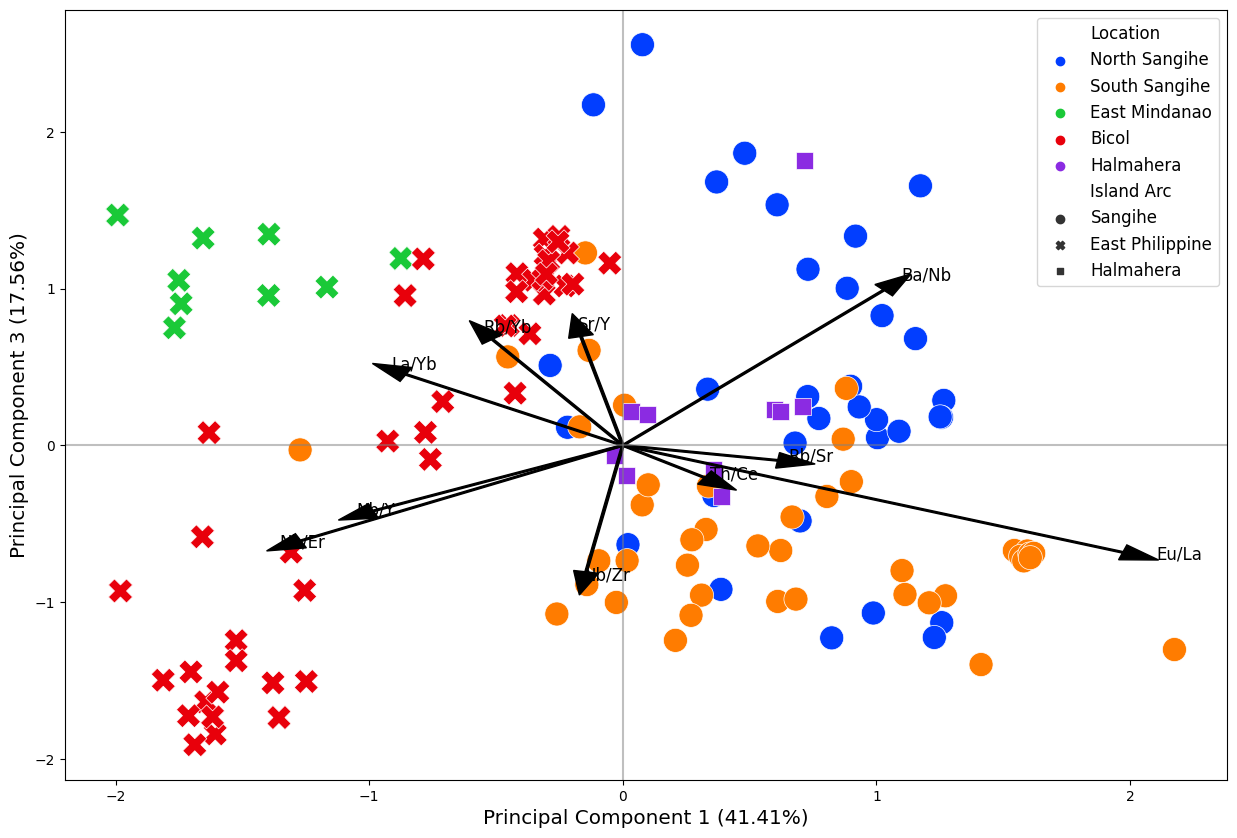

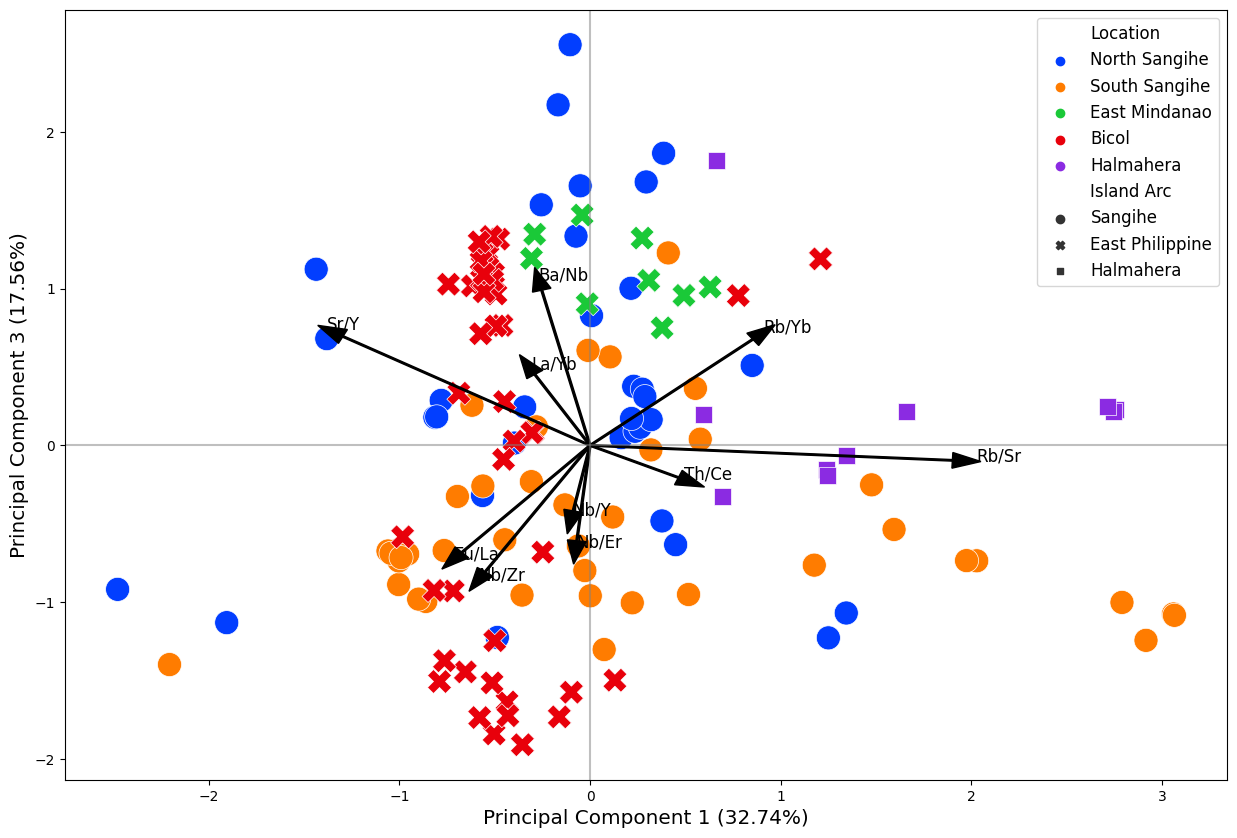

In [6]:
# PC1vsPC2
fig1, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=principalComponentsDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="PC1",
                y="PC2",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")

plt.legend(fontsize="large", loc=1)
plt.xlabel(f'Principal Component 1 ({explainedVarianceRatio[0]*100:.2f}%)', fontsize="x-large")
plt.ylabel(f'Principal Component 2 ({explainedVarianceRatio[1]*100:.2f}%)', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
for i, feature in enumerate(ratio):
    plt.arrow(0,
              0,  
              3 * loadingVectors[i, 0],
              3 * loadingVectors[i, 1],
              color='black',
              width=0.01,
              head_width=0.1)
    plt.text(3.2 * loadingVectors[i, 0],
             3.2 * loadingVectors[i, 1],
             feature,
             fontsize="large")
plt.savefig(f'PCA_trace_{transformatorName}_1vs2.svg')

# PC1vsPC3
fig2, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=principalComponentsDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="PC1",
                y="PC3",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")

plt.legend(fontsize="large", loc=1)
plt.xlabel(f'Principal Component 1 ({explainedVarianceRatio[0]*100:.2f}%)', fontsize="x-large")
plt.ylabel(f'Principal Component 3 ({explainedVarianceRatio[2]*100:.2f}%)', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
for i, feature in enumerate(ratio):
    plt.arrow(0,
              0,  
              3 * loadingVectors[i, 0],
              3 * loadingVectors[i, 2],
              color='black',
              width=0.01,
              head_width=0.1)
    plt.text(3.2 * loadingVectors[i, 0],
             3.2 * loadingVectors[i, 2],
             feature,
             fontsize="large")
plt.savefig(f'PCA_trace_{transformatorName}_1vs3.svg')

# PC2vsPC3
fig3, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=principalComponentsDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="PC2",
                y="PC3",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")

plt.legend(fontsize="large", loc=1)
plt.xlabel(f'Principal Component 1 ({explainedVarianceRatio[1]*100:.2f}%)', fontsize="x-large")
plt.ylabel(f'Principal Component 3 ({explainedVarianceRatio[2]*100:.2f}%)', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
for i, feature in enumerate(ratio):
    plt.arrow(0,
              0,  
              3 * loadingVectors[i, 1],
              3 * loadingVectors[i, 2],
              color='black',
              width=0.01,
              head_width=0.1)
    plt.text(3.2 * loadingVectors[i, 1],
             3.2 * loadingVectors[i, 2],
             feature,
             fontsize="large")
plt.savefig(f'PCA_trace_{transformatorName}_2vs3.svg')

## ICA

In [7]:
def ic(whitenedData, concatData, frame):
    ica = FastICA(whiten= False, max_iter=10000)
    icaData = ica.fit_transform(whitenedData)
    icaIndependentComponent = pd.DataFrame(data=icaData, columns=['IC1', 'IC2', 'IC3'])
    icaDataframe = pd.concat([icaIndependentComponent, concatData[frame]], axis=1)
    
    return icaIndependentComponent, icaDataframe

icaIndependentComponent, icaDataframe = ic(principalComponent, concatData, frame)

In [8]:
icaIndependentComponent

,IC1,IC2,IC3
0,-1.995792,-0.330834,-0.163916
1,-1.586729,-0.291790,-0.158659
2,0.257806,1.067851,1.593766
3,-0.878416,0.025333,0.478542
4,-1.351927,0.002928,0.070986
...,...,...,...
132,-0.434556,1.611418,0.147010
133,-0.301824,0.557377,0.038429
134,-0.047568,1.216502,0.322593
135,-0.129601,1.323676,0.224592


In [9]:
icaDataframe

,IC1,IC2,IC3,Location,Longitude,Latitude,AGE,Sample Name,Island Arc
0,-1.995792,-0.330834,-0.163916,North Sangihe,125.800,4.500,PLIOCENE [16735],s_PJ-40-78 [16735],Sangihe
1,-1.586729,-0.291790,-0.158659,North Sangihe,125.700,4.233,PLIOCENE [16735],s_PJ-43-78 [16735],Sangihe
2,0.257806,1.067851,1.593766,North Sangihe,125.716,3.866,PLIOCENE [16735],s_PJ-45-78 [16735],Sangihe
3,-0.878416,0.025333,0.478542,North Sangihe,125.583,3.783,PLIOCENE [16735],s_PBUANG [16735],Sangihe
4,-1.351927,0.002928,0.070986,North Sangihe,125.583,3.783,PLIOCENE [16735],s_PJ-5-78 [16735],Sangihe
...,...,...,...,...,...,...,...,...,...
132,-0.434556,1.611418,0.147010,Halmahera,127.330,0.800,NaN,s_GL [25001],Halmahera
133,-0.301824,0.557377,0.038429,Halmahera,127.350,0.300,NaN,s_MK1 [25001],Halmahera
134,-0.047568,1.216502,0.322593,Halmahera,127.350,0.300,NaN,s_MK2 [25001],Halmahera
135,-0.129601,1.323676,0.224592,Halmahera,127.350,0.300,NaN,s_MK3 [25001],Halmahera


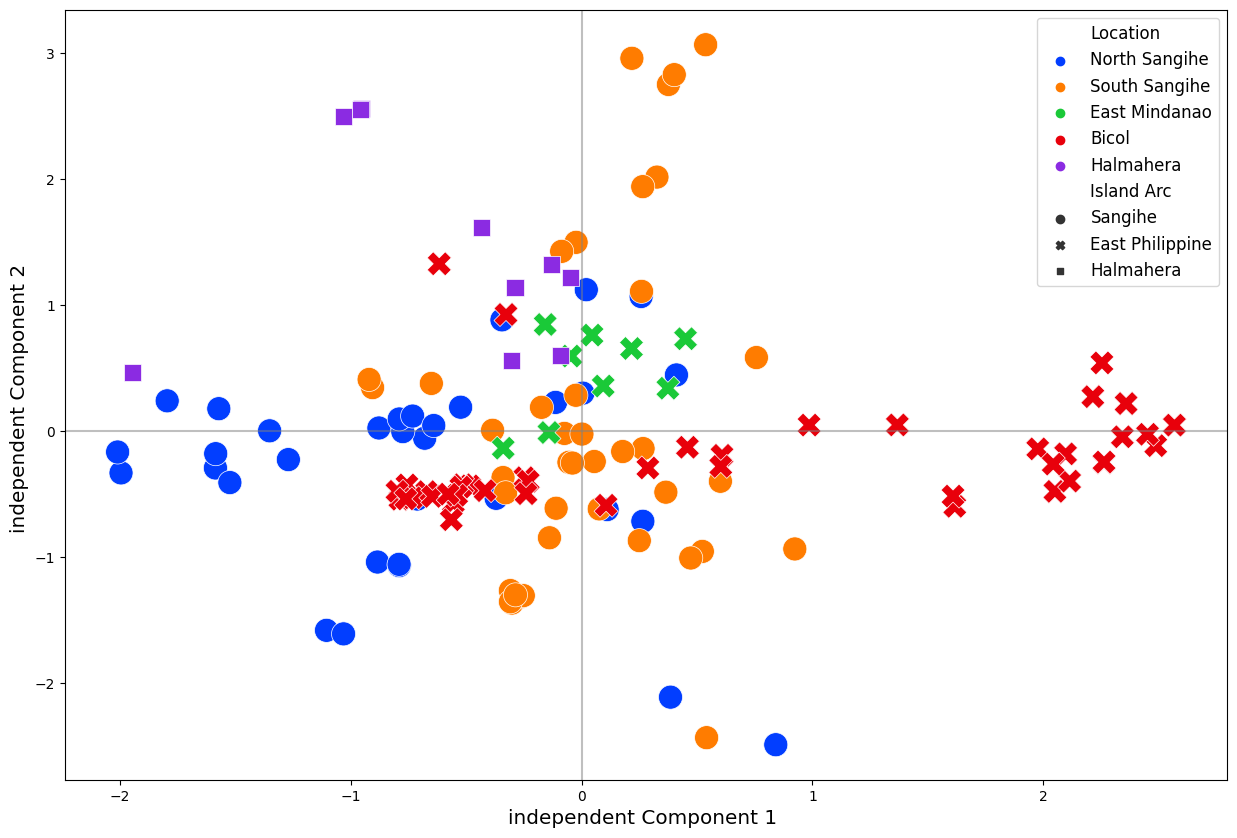

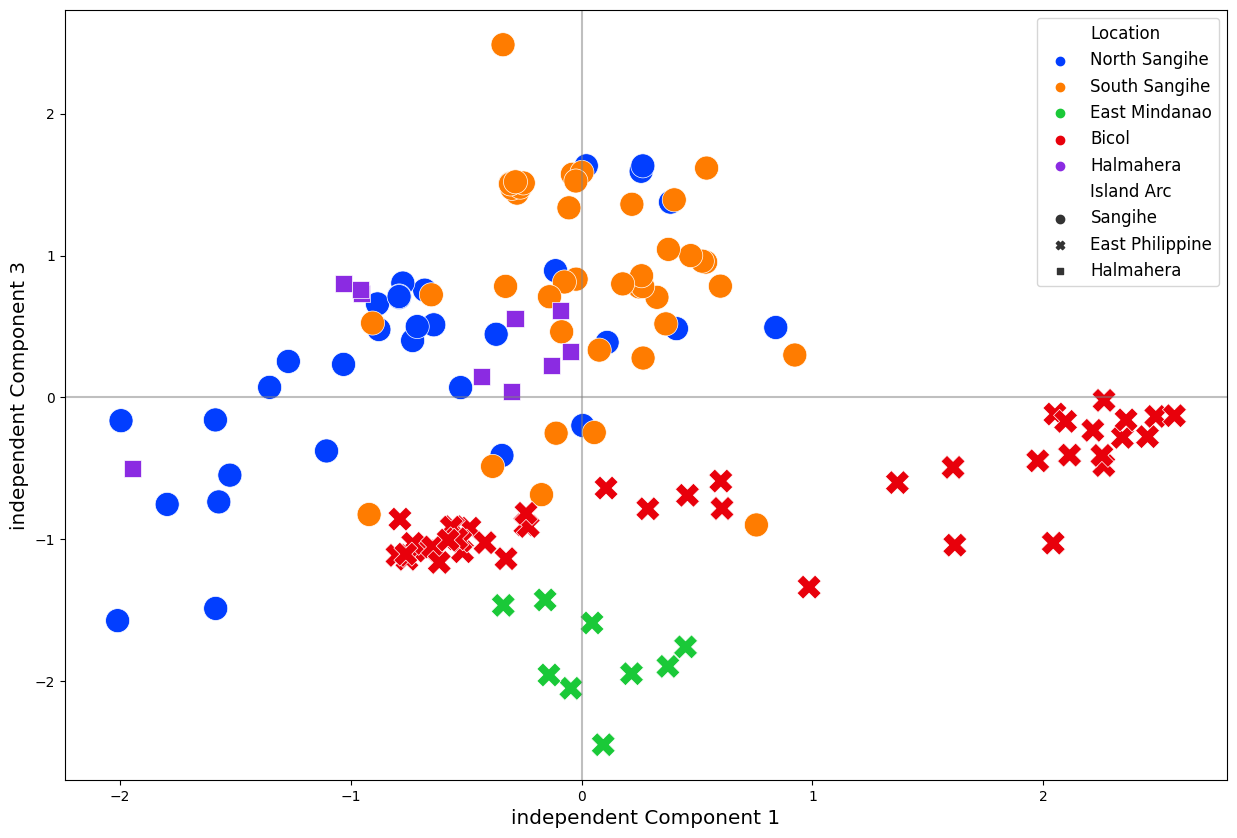

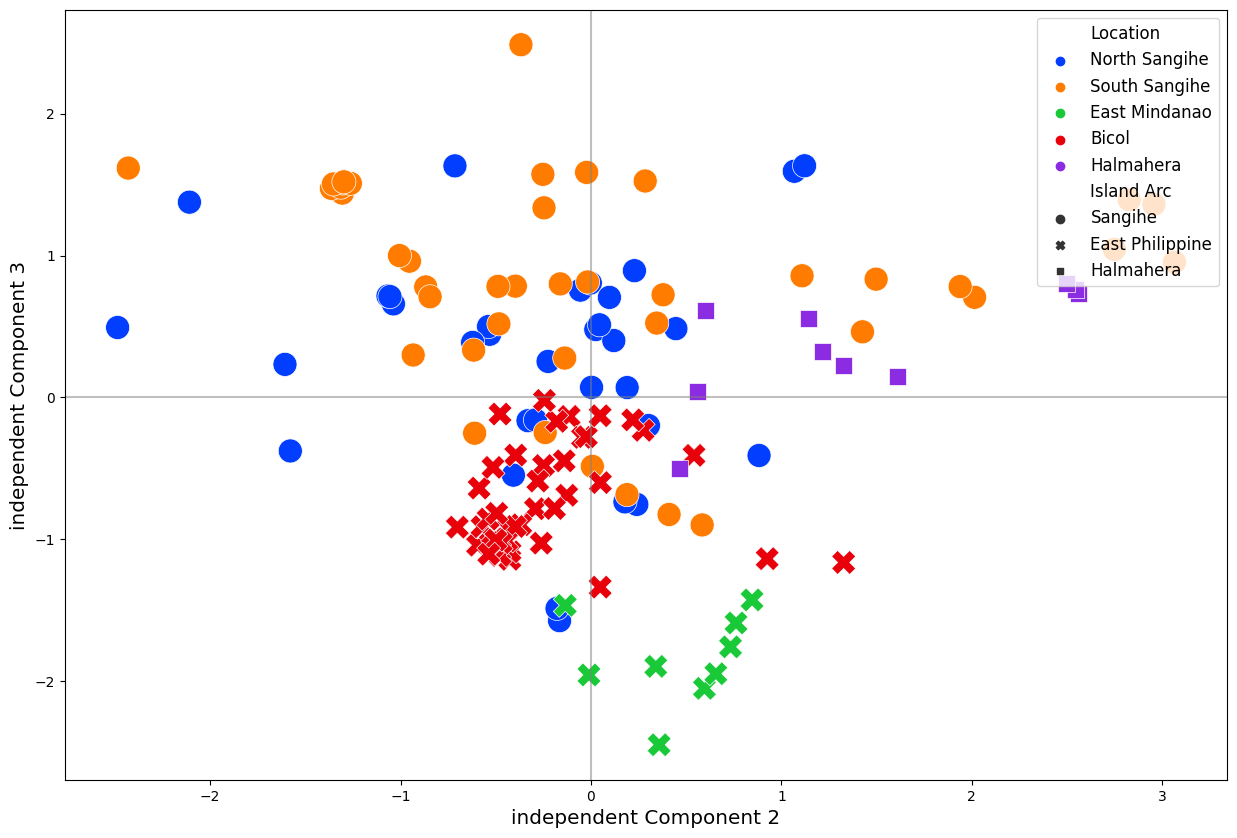

In [10]:
# IC1vsIC2
figx, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=icaDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="IC1",
                y="IC2",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")
plt.legend(fontsize="large", loc=1)
plt.xlabel(f'independent Component 1 ', fontsize="x-large")
plt.ylabel(f'independent Component 2 ', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
plt.savefig(f'ICA_trace_{transformatorName}_1vs2.svg')
# IC1vsIC3
figy, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=icaDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="IC1",
                y="IC3",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")
plt.legend(fontsize="large", loc=1)
plt.xlabel(f'independent Component 1', fontsize="x-large")
plt.ylabel(f'independent Component 3', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
plt.savefig(f'ICA_trace_{transformatorName}_1vs3.svg')
# IC2vsIC3
figz, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=icaDataframe,
                edgecolors="black",
                linewidth=0.5,
                x="IC2",
                y="IC3",
                s=300,
                palette='bright',
                hue="Location",
                style="Island Arc")
plt.legend(fontsize="large", loc=1)
plt.xlabel(f'independent Component 2', fontsize="x-large")
plt.ylabel(f'independent Component 3', fontsize="x-large")
ax.axhline(y=0, color='gray', alpha=0.5)
ax.axvline(x=0, color='gray', alpha=0.5)
plt.savefig(f'ICA_trace_{transformatorName}_2vs3.svg')

## KCA

this process just to cluster the data and will be separated from data tranformation